In [1]:
import sys
sys.path.insert(0, '/home/work/Simulation/G2/G2Ana/SRKAnalysis')
import srkdata 
import srkmisc 
import srkmultiprocessing 
import srkanalysis 
import sqlite3 
import numpy as np 
from datetime import date 
import time 
import srkglobal
import srkplotting as spl
import numpy as np
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.12/06


In [12]:
start_time = time.time()
today = date.today()

s = srkdata.default_srk_settings("g2")
r = srkdata.default_run_settings("g2")
srkglobal.set_computer("home_laptop")

# SRK settings and run settings
r['Title'] = 'Test'
r['SRKVersion'] = 'develop'
r['Date'] = today.strftime('%m/%d/%y')
r['RunType'] = 'testCases'
r['NumTracks'] = 1
                
                
s['TimeLimit'] = 1e-4#1e-5
s['RecordPeriodicSteps'] = 1
s['RecordE'] = 1
s['EContinuous'] = 0
s['PeriodicStopTime'] = 1e-9
s['UseAltStepping'] = 0
s['ConstStepper'] = 0
s['InitialStepSize'] = 1e-10
s['ManualTracking'] = 1
s['RingRadius'] = 7.112
s['StorageDiameter'] = 0.09
s['RandomSeed'] = 0
s['InitialPos'] = '7.112 0 0'
s['InitialVel'] = '0 647638.576022 299617141.695'
#s['InitialVel'] = '645701.576421 0 299617841.647'
s['Mass'] = 1.883531594e-28
s['GyromagneticRatio'] = 0.00116592091
s['InitialMag'] = '0 0 1'
s['EPSAbs'] = 1e-13
s['EPSRel'] = 1e-11
#s['B0FieldStrength'] = "1.4513"
#s['B0FieldDirection'] = '0 -1 0'
s['BQuadFieldStrength'] = 0.
s['EQuadFieldStrength'] = 0.
#s['EQuadFieldStrength'] = 9.6e6
mstr = 1.4513*2
s['BMultiFieldStrength'] = mstr
s['BMultiOrder'] = 0
s['BMultiSkew'] = 0
estr = -9.6e6*2*2
s['EMultiFieldStrength'] = estr
s['EMultiOrder'] = 1

#calculate velocity from momentum
p = 1.6537e-18*1.002
gamma = np.sqrt(1 + (p/(s['Mass']*299792458.))**2)
v = p/(gamma*s['Mass'])
#s['InitialVel'] = '0 0 '+str(v)

In [13]:
srkdata.make_and_run(s,r)

Insert String: INSERT INTO RunLog(ConstStepper,NumTracks,SRKVersion,EPSRel,ManualTracking,Mass,RunType,Run,EPSAbs,RecordPeriodicSteps,InitialPos,UseAltStepping,InitialMag,RandomSeed,EQuadFieldStrength,PeriodicStopTime,GyromagneticRatio,InitialStepSize,TimeLimit,Title,B0FieldDirection,Date,BQuadFieldStrength,B0FieldStrength,InitialVel) Values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)

Values: 
(0, 1, 'develop', 1e-11, 1, 1.883531594e-28, 'testCases', 255, 1e-13, 1, '7.112 0 0', 0, '0 0 1', 0, 0.0, 1e-09, 0.00116592091, 1e-10, 0.0001, 'Test', '0 1 0', '01/12/20', 0.0, 0.0, '0 647638.576022 299617141.695')
/home/work/Simulation/G2/G2Out/macros/RID255.mac created.

/home/work/Simulation/G2/G2Sim/Debug/G2Sim /home/work/Simulation/G2/G2Out/macros/RID255.mac > /home/work/Simulation/G2/G2Out/logs/logRID255.txt
Update String: UPDATE RunLog SET ResultsFilePath=?WHERE Run=255

Values: 
('/home/work/Simulation/G2/G2Out/results/Results_RID255.root',)


Info in <TGeoManager::TGeoManager>: Geometry theManager, SRK Simulation Geometry created
Warning in <TVector3::SetMag>: zero vector can't be stretched
Warning in <TVector3::SetMag>: zero vector can't be stretched
Warning in <TVector3::SetMag>: zero vector can't be stretched
Warning in <TVector3::SetMag>: zero vector can't be stretched


In [4]:
vel = ['0 0 299617841.647', '645701.576421 0 299617841.647', '0 647638.576022 299617141.695']
E = [0, 9.6e6]
for v in vel:
    s['InitialVel'] = v
    for e in E:
        s['EQuadFieldStrength'] = e
        srkdata.make_and_run(s,r)

Insert String: INSERT INTO RunLog(Title,NumTracks,SRKVersion,EPSRel,ManualTracking,Mass,RunType,Run,EPSAbs,RecordPeriodicSteps,InitialPos,UseAltStepping,InitialMag,RandomSeed,EQuadFieldStrength,PeriodicStopTime,GyromagneticRatio,InitialStepSize,TimeLimit,B0FieldDirection,Date,BQuadFieldStrength,B0FieldStrength,ConstStepper,InitialVel) Values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)

Values: 
('Test', 1, 'develop', 1e-11, 1, 1.883531594e-28, 'testCases', 117, 1e-11, 1, '7.112 0 0', 0, '0 0 1', 0, 0, 1e-09, 0.00116592091, 1e-11, 1e-05, '0 -1 0', '10/20/19', 0.0, 1.4513, 1, '0 0 299617841.647')
/home/work/Simulation/G2/G2Out/macros/RID117.mac created.

/home/work/Simulation/G2/G2Sim/Debug/G2Sim /home/work/Simulation/G2/G2Out/macros/RID117.mac > /home/work/Simulation/G2/G2Out/logs/logRID117.txt
Update String: UPDATE RunLog SET ResultsFilePath=?WHERE Run=117

Values: 
('/home/work/Simulation/G2/G2Out/results/Results_RID117.root',)
Insert String: INSERT INTO RunLog(Title,NumTracks

Info in <TGeoManager::TGeoManager>: Geometry theManager, SRK Simulation Geometry created
Warning in <TVector3::SetMag>: zero vector can't be stretched
Info in <TGeoManager::TGeoManager>: Geometry theManager, SRK Simulation Geometry created
Warning in <TVector3::SetMag>: zero vector can't be stretched
Warning in <TVector3::SetMag>: zero vector can't be stretched
Warning in <TVector3::SetMag>: zero vector can't be stretched
Info in <TGeoManager::TGeoManager>: Geometry theManager, SRK Simulation Geometry created
Warning in <TVector3::SetMag>: zero vector can't be stretched
Info in <TGeoManager::TGeoManager>: Geometry theManager, SRK Simulation Geometry created
Warning in <TVector3::SetMag>: zero vector can't be stretched
Warning in <TVector3::SetMag>: zero vector can't be stretched
Warning in <TVector3::SetMag>: zero vector can't be stretched
Info in <TGeoManager::TGeoManager>: Geometry theManager, SRK Simulation Geometry created
Warning in <TVector3::SetMag>: zero vector can't be stretch

In [6]:
def cosinus(t, A, w):
    return A*np.cos(w*t)
theo = 1.6021766208e-19*0.00116592091*1.4513/1.883531594e-28

def w_a(MdotV, time_arr):
    pars, covs = curve_fit(cosinus, time_arr, MdotV, [1, theo])
    return (pars[1], covs[1,1])

def ppb(MdotV, time_arr):
    wa = w_a(MdotV, time_arr)[0]
    return (wa-theo)*1e9/theo

In [18]:
srkglobal.set_computer("home_laptop")
srkglobal.set_graphs_dir('/home/work/Simulation/G2/G2Out/graphs/')
#bid = range(99,105)
bid = [172]

for i in bid:
    btree = spl.make_tree_to_array(i)
    ctree = spl.make_tree_to_array(i+23)
    time_arr = spl.make_timeline(i)

    MdotV = btree[10][:-1]
    bsim = w_a(MdotV, time_arr)
    print "Simulated base case: ", bsim[0]
    MdotV = ctree[10][:-1]
    csim = w_a(MdotV, time_arr)
    print "Simulated comparison case: ", csim[0]
    print "Difference (ppb): ", (bsim[0]-csim[0])*1e9/bsim[0], "\n"

No results file found for RunID 195. Aborting.


ValueError: array must not contain infs or NaNs

In [156]:
srkglobal.set_computer("home_laptop")
srkglobal.set_graphs_dir('/home/work/Simulation/G2/G2Out/graphs/')
bid = 207

tree = spl.make_tree_to_array(bid)
time_arr = spl.make_timeline(bid)

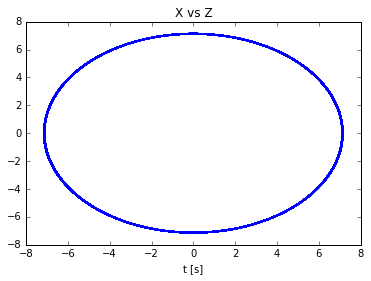

In [158]:
x = tree[0]
y = tree[1]
z = tree[2]

spl.plot_single('X vs Z', z, x, 'show')

In [157]:
MdotV = tree[10]
sim = w_a(MdotV, time_arr)
print "Simulated: ", sim[0]
print "Theoretical: ", theo
print "ppb: ", ppb(MdotV, time_arr)

Simulated:  1439371.32874
Theoretical:  1439341.23409
ppb:  20908.6283347


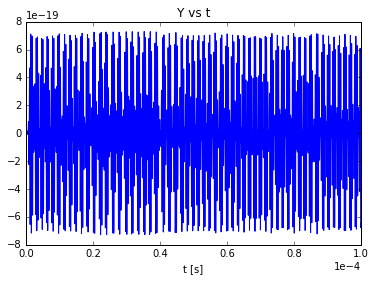

In [104]:
spl.plot_single('Y vs t', y, time_arr, 'show')

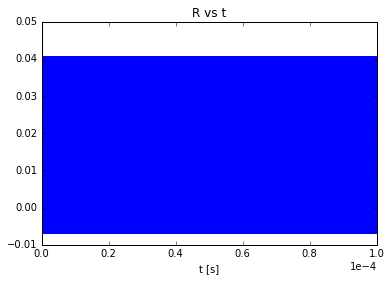

In [159]:
r = np.sqrt(x**2 + z**2) - 7.112
spl.plot_single('R vs t', r, time_arr, 'show')

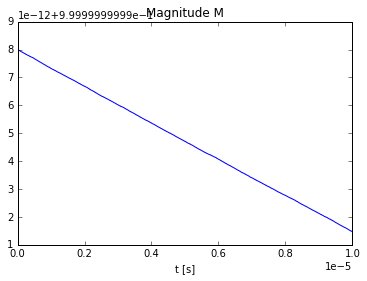

1.0


In [41]:
magM = tree[9]
spl.plot_single('Magnitude M', magM, time_arr, 'show')
print magM[1]

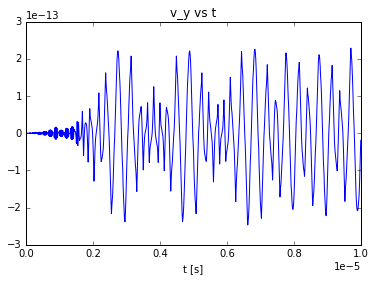

In [34]:
vx = tree[3]
vy = tree[4]
vz = tree[5]

spl.plot_single('v_y vs t', vy, time_arr, 'show')

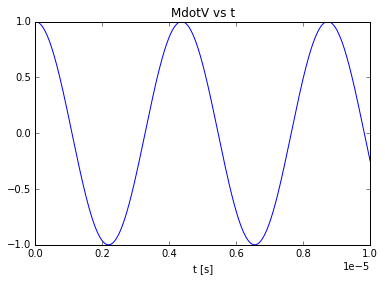

In [94]:
Mv = tree[10][:-1]

spl.plot_single('MdotV vs t', Mv, time_arr, 'show')